Program META (All-Datasets) started at 14:53:10


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ludso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


file datasets.pkl read successfully
Adding romulo with datasets: 1248
file datasets.pkl read successfully
Adding sqlite with datasets: 833
file datasets.pkl read successfully
Adding domain_net with datasets: 976
file datasets.pkl read successfully
Adding ics_uci with datasets: 110
Function:get_zips() started at 14:53:27
Function:get_zips() finished at 15:54:09 in 60.70961087 minutes
Function:get_zips() started at 15:54:15
Function:get_zips() finished at 15:54:15 in 0.0035987466666711045 minutes
Function:LSH-based Similarity started at 15:54:18
Processing total datasets: 3167
Function:LSH-based Similarity finished at 16:58:04 in 63.762943240000006 minutes
largest_shape == 5090
nbits == 2
3167 / 4 = 791.75, samples_buckets: 791.75, prev_samples_buckets:inf
nbits == 4
3167 / 16 = 197.9375, samples_buckets: 197.9375, prev_samples_buckets:791.75
nbits == 8
3167 / 256 = 12.37109375, samples_buckets: 12.37109375, prev_samples_buckets:197.9375
nbits == 16
3167 / 65536 = 0.0483245849609375, sam

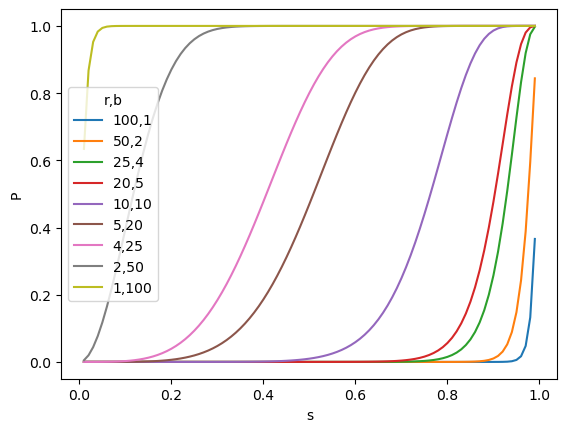

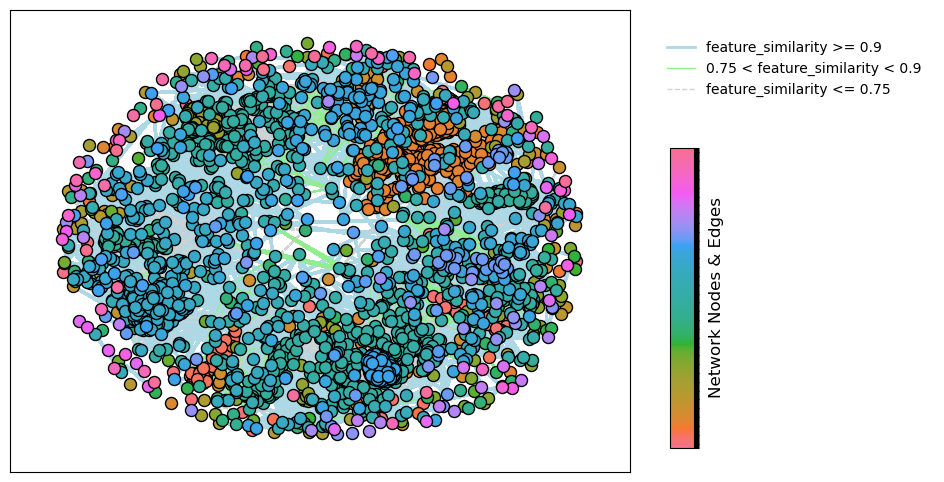

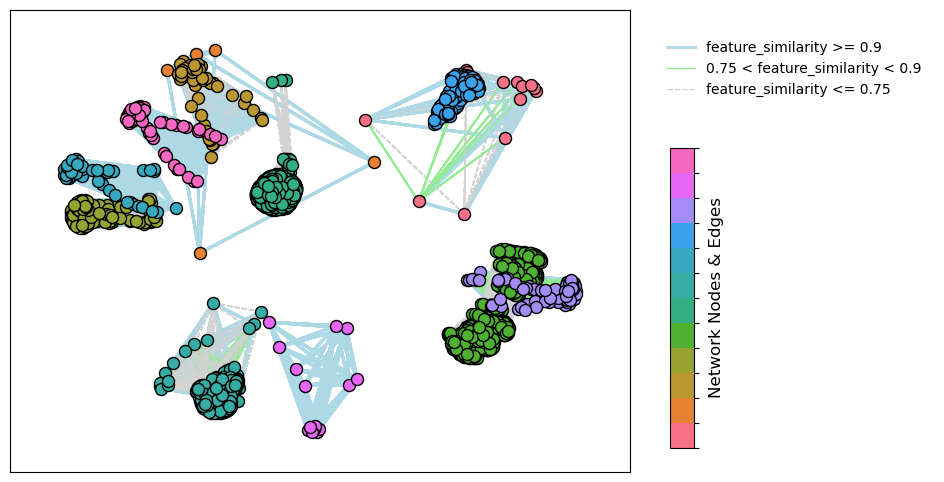

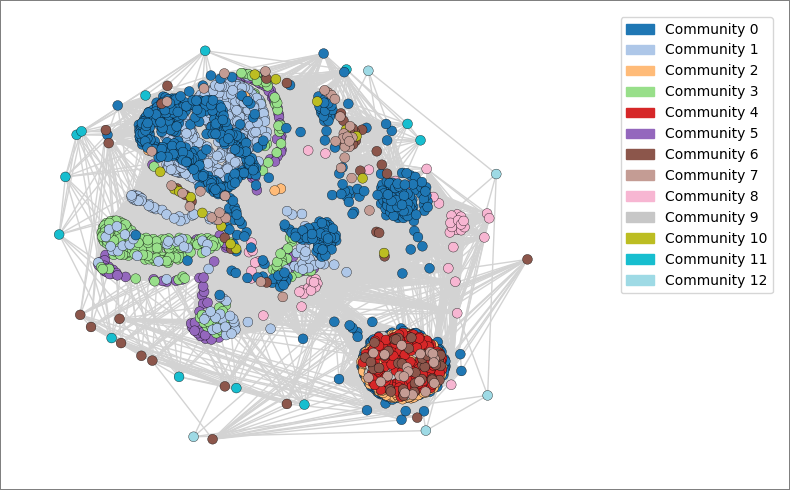

Fold 1 - Accuracy: 0.95419, Precision: 0.95442, Recall: 0.95419, F1-Score: 0.94900

Average Metrics Across Folds:
Average Accuracy: 0.19084
Average Precision: 0.19088
Average Recall: 0.19084
Average F1-Score: 0.18980
Fold 2 - Accuracy: 0.94155, Precision: 0.93795, Recall: 0.94155, F1-Score: 0.93380

Average Metrics Across Folds:
Average Accuracy: 0.37915
Average Precision: 0.37847
Average Recall: 0.37915
Average F1-Score: 0.37656
Fold 3 - Accuracy: 0.94313, Precision: 0.93960, Recall: 0.94313, F1-Score: 0.93805

Average Metrics Across Folds:
Average Accuracy: 0.56777
Average Precision: 0.56639
Average Recall: 0.56777
Average F1-Score: 0.56417
Fold 4 - Accuracy: 0.94155, Precision: 0.93191, Recall: 0.94155, F1-Score: 0.93360

Average Metrics Across Folds:
Average Accuracy: 0.75608
Average Precision: 0.75278
Average Recall: 0.75608
Average F1-Score: 0.75089
Fold 5 - Accuracy: 0.93829, Precision: 0.93556, Recall: 0.93829, F1-Score: 0.93290

Average Metrics Across Folds:
Average Accuracy: 

<Figure size 800x600 with 0 Axes>

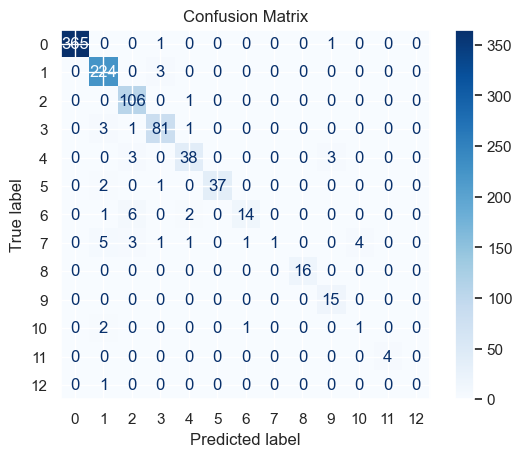

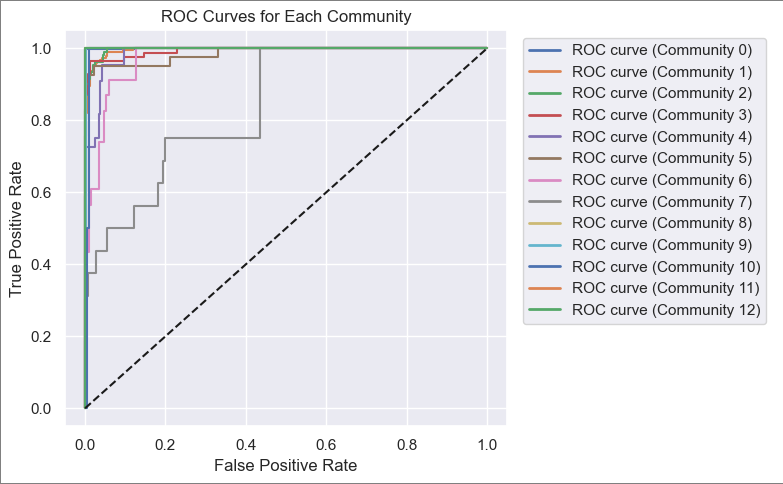

Fold 1 - Accuracy: 0.95261, Precision: 0.95340, Recall: 0.95261, F1-Score: 0.94623

Average Metrics Across Folds:
Average Accuracy: 0.19052
Average Precision: 0.19068
Average Recall: 0.19052
Average F1-Score: 0.18925
Fold 2 - Accuracy: 0.94155, Precision: 0.93795, Recall: 0.94155, F1-Score: 0.93380

Average Metrics Across Folds:
Average Accuracy: 0.37883
Average Precision: 0.37827
Average Recall: 0.37883
Average F1-Score: 0.37600
Fold 3 - Accuracy: 0.94313, Precision: 0.93954, Recall: 0.94313, F1-Score: 0.93801

Average Metrics Across Folds:
Average Accuracy: 0.56746
Average Precision: 0.56618
Average Recall: 0.56746
Average F1-Score: 0.56361
Fold 4 - Accuracy: 0.94155, Precision: 0.93191, Recall: 0.94155, F1-Score: 0.93360

Average Metrics Across Folds:
Average Accuracy: 0.75577
Average Precision: 0.75256
Average Recall: 0.75577
Average F1-Score: 0.75033
Fold 5 - Accuracy: 0.93829, Precision: 0.93556, Recall: 0.93829, F1-Score: 0.93290

Average Metrics Across Folds:
Average Accuracy: 

<Figure size 800x600 with 0 Axes>

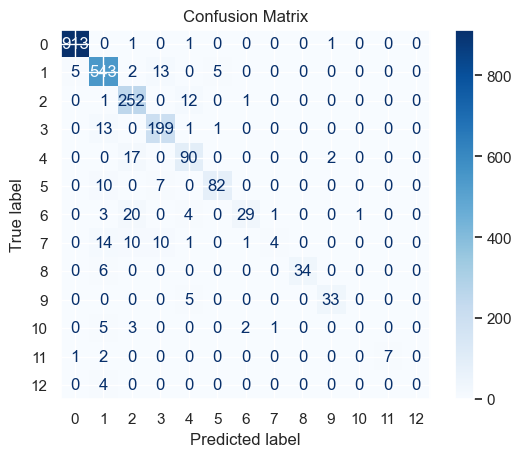

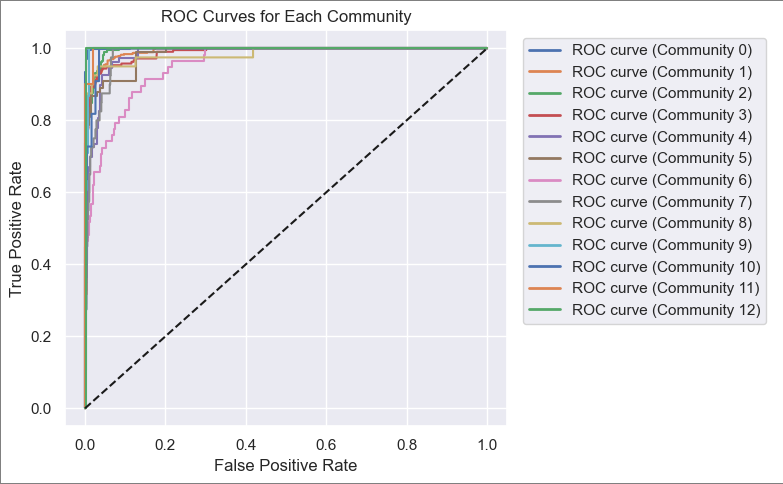

Program META (All-Datasets) finished at 18:33:16 in 220.112160235 minutes


In [ ]:
import time
s_t = time.strftime("%H:%M:%S", time.localtime())
start_time = time.perf_counter()
print(f"Program META (All-Datasets) started at {s_t}")

#preparation
%run Discovery.LSH.Networkx.Module.ipynb
root_dirs = {
    'romulo': ['data\\romulo\\data-lakes\\clustering\\', 1000000],
    'sqlite': ['data\\sqlite\\', np.inf],
    'domain_net': ['data\\domain_net\\table_union_search\\cleaned\\csvfiles\\', np.inf],
    'ics_uci': ['data\\ics_uci\\all\\cleaned\\dataset\\', np.inf]
}
encoding='ISO-8859-1'
sep = ","
n_hash_fs = 50 #reduced due to high number of dataset to process
n_bands = 10 #reduced due to high number of dataset to process
csv_infer, datasets, ini_nodes, init_edges, merge_nodes, merge_edges = \
prepare_all(root_dirs, False, encoding=encoding, sep=sep, n_hash_fs=n_hash_fs, n_bands=n_bands)

#draw charts
max_metadata_length=100
untrained_model, trained_kfold_model, trained_shuffle_model, communities, community_labels, feature_vocab, X, y = \
draw_all(csv_infer, datasets, ini_nodes, init_edges, merge_nodes, merge_edges, encoding=encoding, sep=sep, max_metadata_length=max_metadata_length)

#redo metrics
random_state=50
train_kfold(community_labels, X, y)

test_size=0.75
random_state=100
train_shuffle(community_labels, X, y, test_size, random_state)


finish_time = time.perf_counter()
e_t = time.strftime("%H:%M:%S", time.localtime())
print(f"Program META (All-Datasets) finished at {e_t} in {(finish_time-start_time)/60} minutes")